In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import numpy as np
import pandas as pd

import yfinance as yf

import tensorflow as tf

import datetime as dt
 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
start = dt.datetime(2015,1,1)
today = dt.datetime(2021,12,31)
def load_data(ticker):
    data = yf.download(ticker, start, today)
    data.reset_index(inplace=True)
    return data

In [6]:
df = load_data('MSFT')

[*********************100%***********************]  1 of 1 completed


In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,46.660000,47.419998,46.540001,46.759998,40.926445,27913900
1,2015-01-05,46.369999,46.730000,46.250000,46.330002,40.550083,39673900
2,2015-01-06,46.380001,46.750000,45.540001,45.650002,39.954929,36447900
3,2015-01-07,45.980000,46.459999,45.490002,46.230000,40.462555,29114100
4,2015-01-08,46.750000,47.750000,46.720001,47.590000,41.652897,29645200


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1757,2021-12-23,332.750000,336.390015,332.730011,334.690002,332.517456,19617800
1758,2021-12-27,335.459991,342.480011,335.429993,342.450012,340.227112,19947000
1759,2021-12-28,343.149994,343.809998,340.320007,341.250000,339.034882,15661500
1760,2021-12-29,341.299988,344.299988,339.679993,341.950012,339.730377,15042000
1761,2021-12-30,341.910004,343.130005,338.820007,339.320007,337.117432,15994500


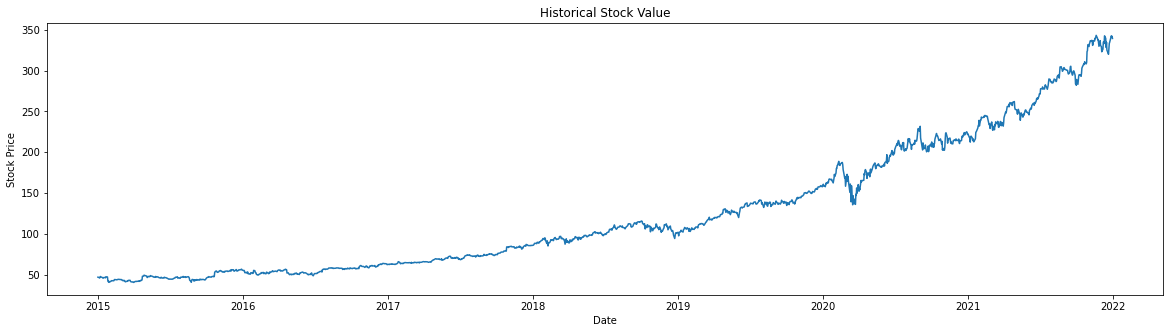

In [9]:
plt.figure(figsize=(20,5))
plt.plot(df['Date'],df['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [10]:
data = df.copy()

In [11]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,46.660000,47.419998,46.540001,46.759998,40.926445,27913900
1,2015-01-05,46.369999,46.730000,46.250000,46.330002,40.550083,39673900
2,2015-01-06,46.380001,46.750000,45.540001,45.650002,39.954929,36447900
3,2015-01-07,45.980000,46.459999,45.490002,46.230000,40.462555,29114100
4,2015-01-08,46.750000,47.750000,46.720001,47.590000,41.652897,29645200


In [12]:
data.shape

(1762, 7)

In [13]:
temp_set = df[['Date','Close']]
training_set = temp_set.iloc[:1500,1:2].values
test_set = temp_set.iloc[1500:,1:2].values

In [14]:
training_set

array([[ 46.75999832],
       [ 46.33000183],
       [ 45.65000153],
       ...,
       [213.25999451],
       [214.19999695],
       [214.13000488]])

In [15]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 1500):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units = 50))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [17]:
!nvidia-smi

Mon Oct 31 07:37:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    31W /  70W |    314MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
45/45 [==============================] - 14s 20ms/step - loss: 0.0251
Epoch 2/50
45/45 [==============================] - 1s 21ms/step - loss: 0.0034
Epoch 3/50
45/45 [==============================] - 1s 22ms/step - loss: 0.0031
Epoch 4/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0027
Epoch 5/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 6/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 7/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0024
Epoch 8/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0023
Epoch 9/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0022
Epoch 10/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 11/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0025
Epoch 12/50
45/45 [==============================] - 1s 13ms/step - loss: 0.0020
Epoch 13/50
45/45 [=================

In [19]:
testdataframe= yf.download('MSFT',dt.datetime(2021,1,1),dt.date.today())
testdataframe.reset_index(inplace=True)
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata[['Date','Close']]
dataset_total = pd.concat((data['Close'], testdata['Close']), axis = 0)

[*********************100%***********************]  1 of 1 completed


In [20]:
dataset_total.shape

(2222,)

In [21]:
real_stock_price.shape

(460, 2)

In [22]:
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 447):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [23]:
predicted = model.predict(X_test)
predicted = sc.inverse_transform(predicted)
predicted

13/13 [==============================] - 1s 7ms/step


array([[288.18942],
       [286.53494],
       [282.02005],
       [275.34076],
       [267.50812],
       [259.40906],
       [251.75351],
       [245.07175],
       [239.76437],
       [235.99919],
       [233.75798],
       [232.93356],
       [233.42737],
       [234.98898],
       [237.2499 ],
       [239.8569 ],
       [242.50352],
       [244.91469],
       [247.00533],
       [248.52298],
       [249.51425],
       [250.0306 ],
       [250.21243],
       [250.12598],
       [249.81851],
       [249.33327],
       [248.74188],
       [248.07129],
       [247.39064],
       [246.75922],
       [246.1734 ],
       [245.64195],
       [245.15709],
       [244.6464 ],
       [243.92734],
       [242.92503],
       [241.71928],
       [240.31267],
       [238.86646],
       [237.65111],
       [236.75519],
       [236.04427],
       [235.40016],
       [234.88277],
       [234.43755],
       [234.19614],
       [234.18411],
       [234.4889 ],
       [235.06511],
       [235.7845 ],


In [24]:
real_stock_price

,Date,Close
0,0,217.690002
1,1,217.899994
2,2,212.250000
3,3,218.289993
4,4,219.619995
...,...,...
455,455,247.250000
456,456,250.660004
457,457,231.320007
458,458,226.750000


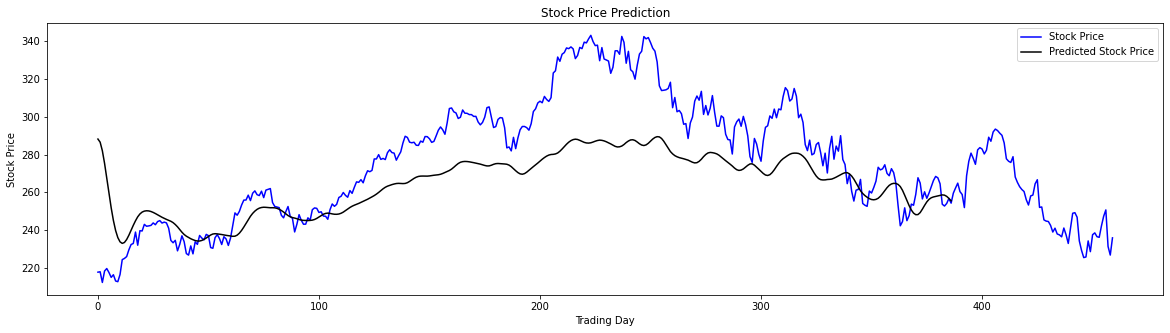

In [46]:
plt.figure(figsize=(20,5))
plot_0 = (plt.plot(real_stock_price['Close'], color = 'blue', label = 'Stock Price'),plt.plot(predicted, color = 'black', label = 'Predicted Stock Price'))
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show(plot_0)

In [26]:
model0 = tf.keras.Sequential()

model0.add(tf.keras.layers.SimpleRNN(units = 50, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model0.add(tf.keras.layers.Dropout(0.2))
model0.add(tf.keras.layers.SimpleRNN(units = 50))
model0.add(tf.keras.layers.Dropout(0.2))
model0.add(tf.keras.layers.Dense(units = 1))
model0.compile(optimizer = 'adam', loss = 'mean_squared_error')
model0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,701
Trainable params: 7,701
Non-trainable params: 0
_________________________________________________________________


In [27]:
model0.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
45/45 [==============================] - 4s 65ms/step - loss: 0.0458
Epoch 2/50
45/45 [==============================] - 3s 63ms/step - loss: 0.0131
Epoch 3/50
45/45 [==============================] - 3s 63ms/step - loss: 0.0086
Epoch 4/50
45/45 [==============================] - 3s 65ms/step - loss: 0.0061
Epoch 5/50
45/45 [==============================] - 3s 65ms/step - loss: 0.0054
Epoch 6/50
45/45 [==============================] - 3s 64ms/step - loss: 0.0046
Epoch 7/50
45/45 [==============================] - 3s 66ms/step - loss: 0.0042
Epoch 8/50
45/45 [==============================] - 3s 63ms/step - loss: 0.0034
Epoch 9/50
45/45 [==============================] - 3s 64ms/step - loss: 0.0035
Epoch 10/50
45/45 [==============================] - 3s 64ms/step - loss: 0.0033
Epoch 11/50
45/45 [==============================] - 3s 64ms/step - loss: 0.0033
Epoch 12/50
45/45 [==============================] - 3s 64ms/step - loss: 0.0031
Epoch 13/50
45/45 [==================

In [28]:
predicted_model_0 = model0.predict(X_test)
predicted_model_0 = sc.inverse_transform(predicted_model_0)
predicted_model_0[:10]

13/13 [==============================] - 0s 11ms/step


array([[327.34854],
       [273.3189 ],
       [235.26485],
       [216.68034],
       [231.95767],
       [225.33978],
       [235.84886],
       [223.20972],
       [229.51611],
       [215.79861]], dtype=float32)

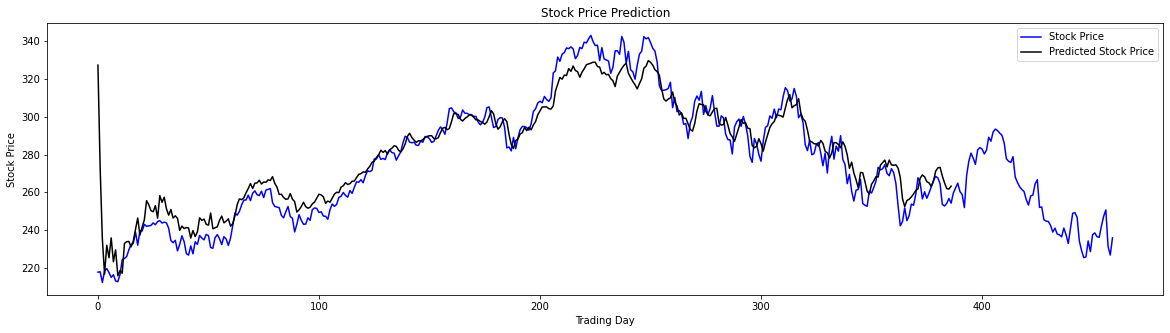

In [44]:
plt.figure(figsize=(20,5))
plot_1 = (plt.plot(real_stock_price['Close'], color = 'blue', label = 'Stock Price'),plt.plot(predicted_model_0, color = 'black', label = 'Predicted Stock Price'))
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [30]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.SimpleRNN(units = 50, activation = 'tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.SimpleRNN(units = 50, return_sequences = True))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.SimpleRNN(units = 50))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(units = 1))
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [31]:
model1.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
45/45 [==============================] - 6s 101ms/step - loss: 0.1820
Epoch 2/50
45/45 [==============================] - 5s 101ms/step - loss: 0.0695
Epoch 3/50
45/45 [==============================] - 4s 98ms/step - loss: 0.0352
Epoch 4/50
45/45 [==============================] - 5s 102ms/step - loss: 0.0272
Epoch 5/50
45/45 [==============================] - 4s 99ms/step - loss: 0.0248
Epoch 6/50
45/45 [==============================] - 4s 99ms/step - loss: 0.0177
Epoch 7/50
45/45 [==============================] - 5s 100ms/step - loss: 0.0128
Epoch 8/50
45/45 [==============================] - 5s 100ms/step - loss: 0.0131
Epoch 9/50
45/45 [==============================] - 6s 124ms/step - loss: 0.0107
Epoch 10/50
45/45 [==============================] - 6s 124ms/step - loss: 0.0096
Epoch 11/50
45/45 [==============================] - 5s 101ms/step - loss: 0.0089
Epoch 12/50
45/45 [==============================] - 5s 103ms/step - loss: 0.0087
Epoch 13/50
45/45 [=========

In [32]:
predicted_model_1 = model1.predict(X_test)
predicted_model_1 = sc.inverse_transform(predicted_model_1)
predicted_model_1[:10]

13/13 [==============================] - 0s 14ms/step


array([[303.95917],
       [272.9492 ],
       [250.23312],
       [224.8033 ],
       [215.28487],
       [216.3684 ],
       [218.83826],
       [215.72095],
       [219.90941],
       [219.063  ]], dtype=float32)

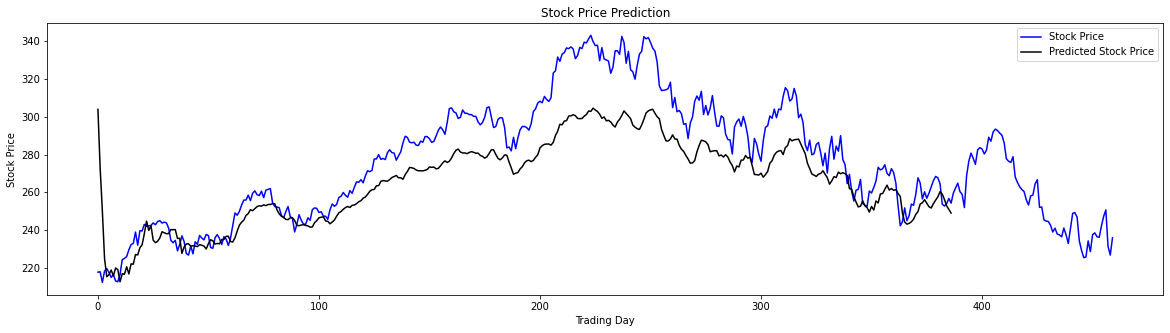

In [49]:
plt.figure(figsize=(20,5))
plot_2 = (plt.plot(real_stock_price['Close'], color = 'blue', label = 'Stock Price'),plt.plot(predicted_model_1, color = 'black', label = 'Predicted Stock Price'))
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show(plot_2)
#387

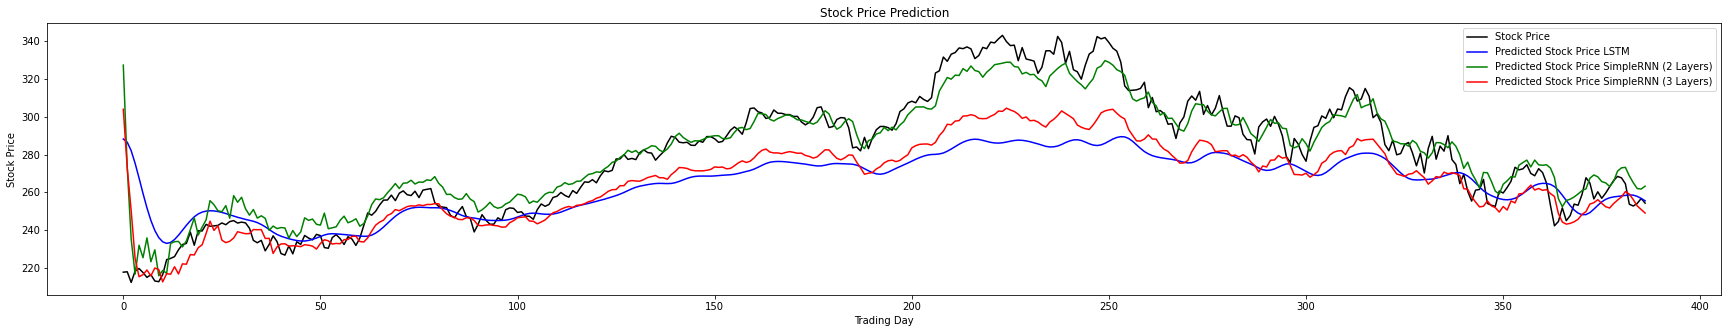

In [77]:
plt.figure(figsize=(30,5))
megaplot = (plt.plot(real_stock_price['Close'][:387], color = 'black', label = 'Stock Price'),
            plt.plot(predicted, color = 'blue', label = 'Predicted Stock Price LSTM'),
            plt.plot(predicted_model_0, color = 'green', label = 'Predicted Stock Price SimpleRNN (2 Layers)'),
            plt.plot(predicted_model_1, color = 'red', label = 'Predicted Stock Price SimpleRNN (3 Layers)'))
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show(megaplot)

In [78]:
ls1 = [mean_squared_error(predicted,real_stock_price['Close'][:387]),mean_squared_error(predicted_model_0,real_stock_price['Close'][:387]),mean_squared_error(predicted_model_1,real_stock_price['Close'][:387])]
ls2 = [mean_absolute_error(predicted,real_stock_price['Close'][:387]),mean_absolute_error(predicted_model_0,real_stock_price['Close'][:387]),mean_absolute_error(predicted_model_1,real_stock_price['Close'][:387])]
ls3 = [r2_score(predicted,real_stock_price['Close'][:387]),r2_score(predicted_model_0,real_stock_price['Close'][:387]),r2_score(predicted_model_1,real_stock_price['Close'][:387])]
ls4 = np.sqrt(ls1)
comp_df = pd.DataFrame({'Model':['Model 1 LSTM','Model 2 SimpleRNN (2 Layers)','Model 3 SimpleRNN (3 Layers)']})
comp_df

,Model
0,Model 1 LSTM
1,Model 2 SimpleRNN (2 Layers)
2,Model 3 SimpleRNN (3 Layers)


In [79]:
comp_df['MSE'] = ls1
comp_df['MAE'] = ls2
comp_df['R2 Score'] = ls3
comp_df['RMSE'] = ls4

In [86]:
comp_df

,Model,MSE,MAE,R2 Score,RMSE
0,Model 1 LSTM,601.731856,19.137135,-1.455313,24.530223
1,Model 2 SimpleRNN (2 Layers),102.581234,6.893391,0.854106,10.128239
2,Model 3 SimpleRNN (3 Layers),360.747644,15.181057,0.254516,18.993358


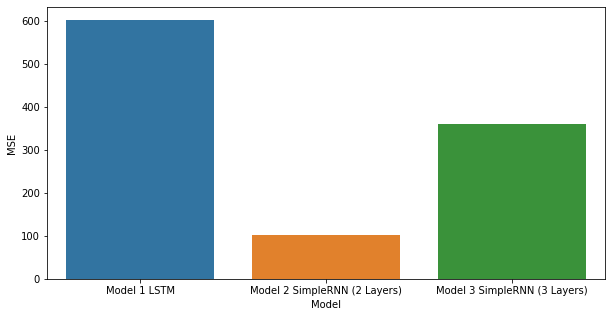

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Model',y = 'MSE', data = comp_df)

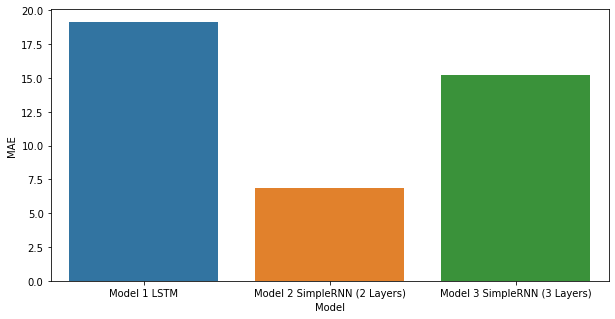

In [83]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Model',y = 'MAE', data = comp_df)

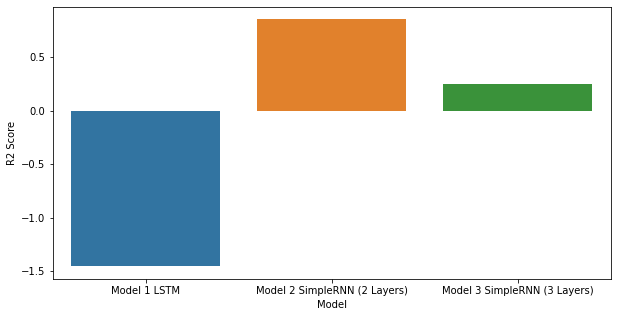

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Model',y = 'R2 Score', data = comp_df)

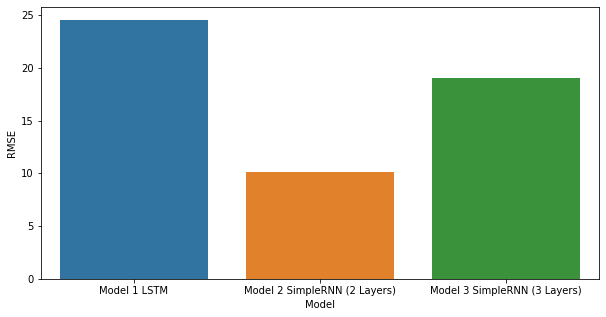

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Model',y = 'RMSE', data = comp_df)